# Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Import data

In [2]:
# data import 
file_path = r'S:\Projects\IABAC Project work\INX_Future_Inc_Employee_Performance_CDS_Project.xls'

data = pd.read_excel(file_path)

In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Outlier Detection:

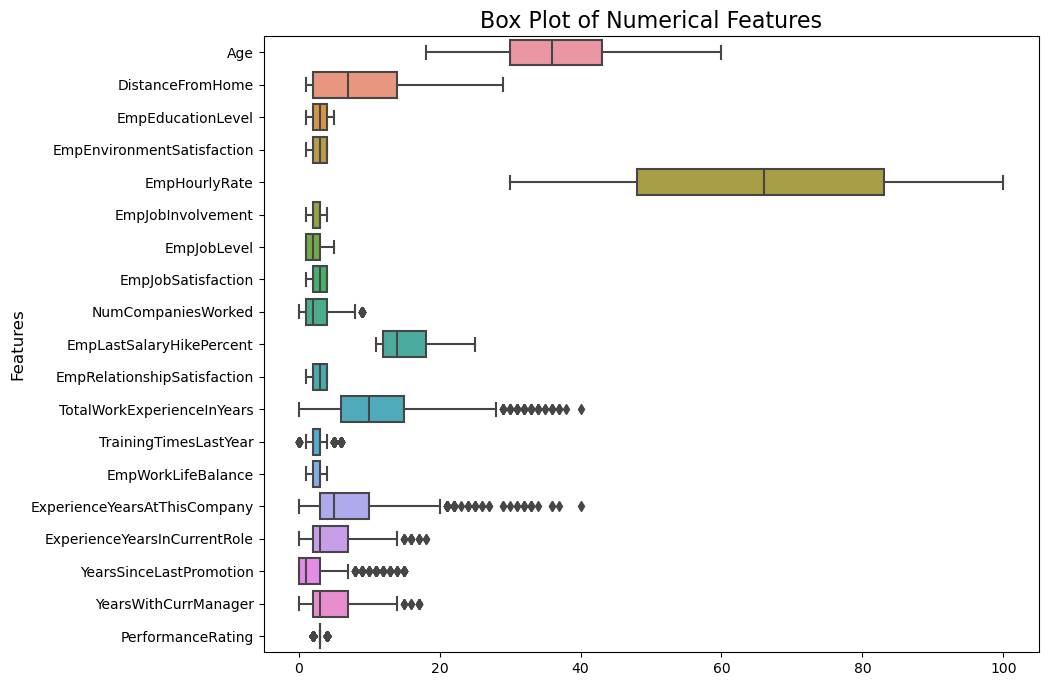

In [4]:
# Visualize outliers using horizontal box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.show()

- These columns are having outliers: 'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.

# Outlier Handling:

## NumCompaniesWorked Outlier:

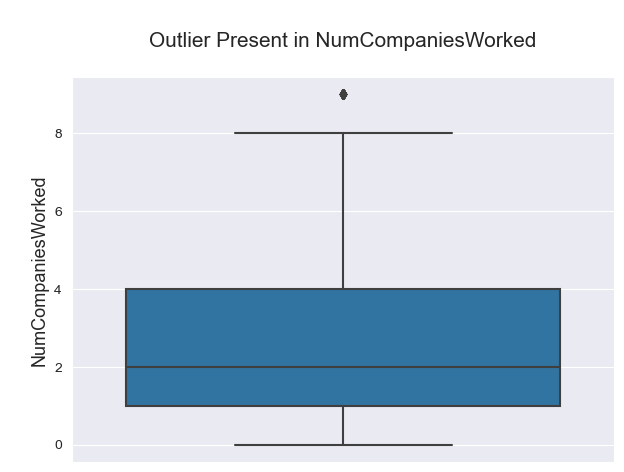

In [5]:
# Outlier Present in NumCompaniesWorked
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["NumCompaniesWorked"]) 
plt.title("\nOutlier Present in NumCompaniesWorked\n", fontsize=15)
plt.ylabel("\nNumCompaniesWorked", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [6]:
#Outlier value present in NumCompaniesWorked using Z-score method
mean = np.mean(data["NumCompaniesWorked"]) 
std = np.std(data["NumCompaniesWorked"]) 
threshold = 3.5
outlier = [] 
for i in data["NumCompaniesWorked"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in NumCompaniesWorked  are ', outlier) 

Outlier in NumCompaniesWorked  are  []


In [7]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["NumCompaniesWorked"], 25)
Q3 = np.percentile(data["NumCompaniesWorked"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["NumCompaniesWorked"] > upper_bound, "NumCompaniesWorked"] = upper_bound
data.loc[data["NumCompaniesWorked"] < lower_bound, "NumCompaniesWorked"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\4240149945.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["NumCompaniesWorked"] > upper_bound, "NumCompaniesWorked"] = upper_bound


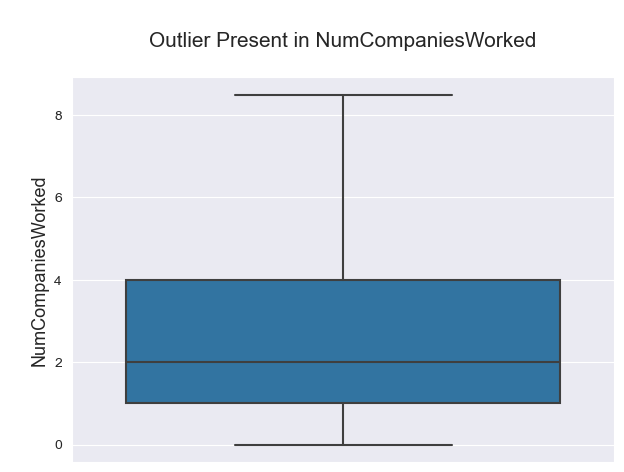

In [8]:
# NumCompaniesWorked :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["NumCompaniesWorked"]) 
plt.title("\nOutlier Present in NumCompaniesWorked\n", fontsize=15)
plt.ylabel("\nNumCompaniesWorked", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## TotalWorkExperienceInYears outlier

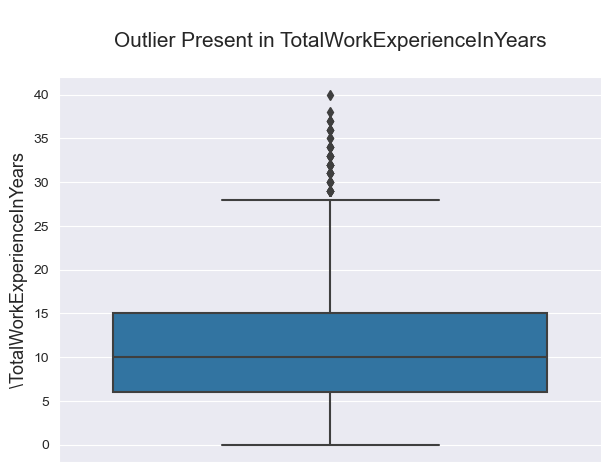

In [9]:
# Outlier Present in TotalWorkExperienceInYears
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TotalWorkExperienceInYears"]) 
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n", fontsize=15)
plt.ylabel("\TotalWorkExperienceInYears", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [10]:
# Outlier value present in TotalWorkExperienceInYears using Z-score method
mean = np.mean(data["TotalWorkExperienceInYears"]) 
std = np.std(data["TotalWorkExperienceInYears"]) 
threshold = 3.5
outlier = [] 
for i in data["TotalWorkExperienceInYears"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [40]


In [11]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["TotalWorkExperienceInYears"], 25)
Q3 = np.percentile(data["TotalWorkExperienceInYears"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["TotalWorkExperienceInYears"] > upper_bound, "TotalWorkExperienceInYears"] = upper_bound
data.loc[data["TotalWorkExperienceInYears"] < lower_bound, "TotalWorkExperienceInYears"] = lower_bound


C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\2317906602.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["TotalWorkExperienceInYears"] > upper_bound, "TotalWorkExperienceInYears"] = upper_bound


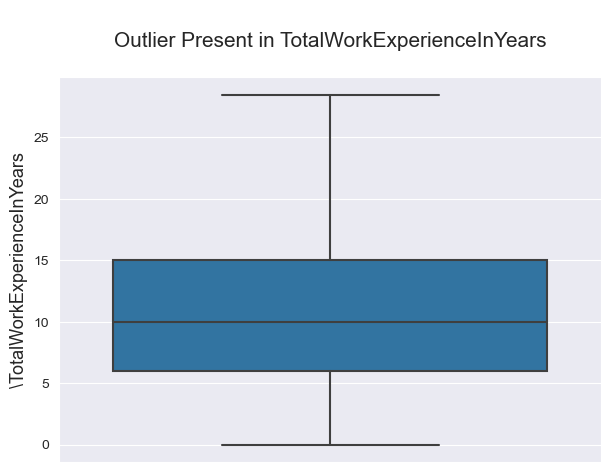

In [12]:
# TotalWorkExperienceInYears :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TotalWorkExperienceInYears"]) 
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n", fontsize=15)
plt.ylabel("\TotalWorkExperienceInYears", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## TrainingTimesLastYear outlier

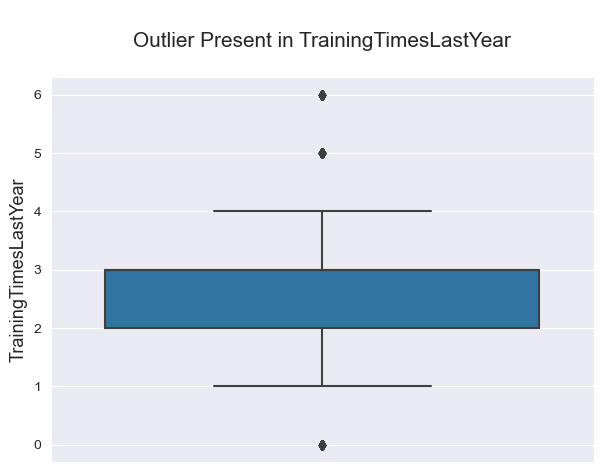

In [13]:
# Outlier Present in TrainingTimesLastYear
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TrainingTimesLastYear"]) 
plt.title("\nOutlier Present in TrainingTimesLastYear\n", fontsize=15)
plt.ylabel("TrainingTimesLastYear", fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [14]:
# Outlier value present in TrainingTimesLastYear using Z-score method
mean = np.mean(data["TrainingTimesLastYear"]) 
std = np.std(data["TrainingTimesLastYear"]) 
threshold = 3.5
outlier = [] 
for i in data["TrainingTimesLastYear"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [15]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["TrainingTimesLastYear"], 25)
Q3 = np.percentile(data["TrainingTimesLastYear"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["TrainingTimesLastYear"] > upper_bound, "TrainingTimesLastYear"] = upper_bound
data.loc[data["TrainingTimesLastYear"] < lower_bound, "TrainingTimesLastYear"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\3204218526.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["TrainingTimesLastYear"] > upper_bound, "TrainingTimesLastYear"] = upper_bound


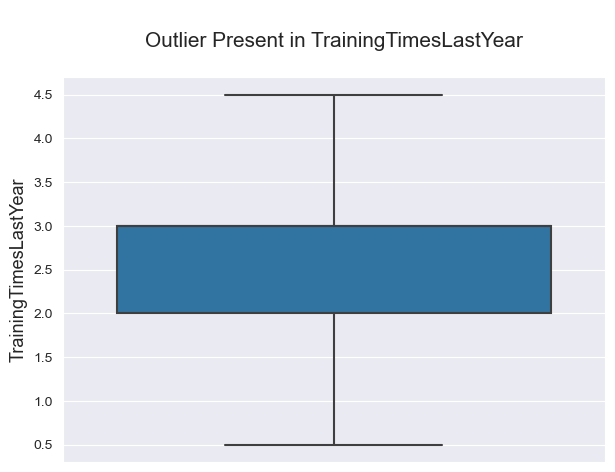

In [16]:
# TrainingTimesLastYear :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TrainingTimesLastYear"]) 
plt.title("\nOutlier Present in TrainingTimesLastYear\n", fontsize=15)
plt.ylabel("TrainingTimesLastYear", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


## ExperienceYearsAtThisCompany

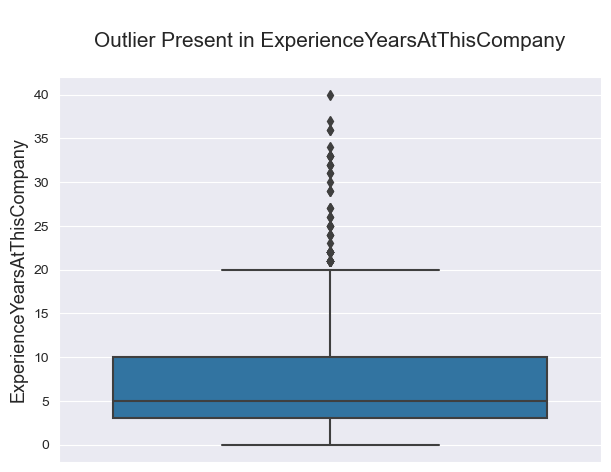

In [17]:
# Outlier Present in ExperienceYearsAtThisCompany
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsAtThisCompany"]) 
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n", fontsize=15)
plt.ylabel("ExperienceYearsAtThisCompany", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [18]:
# Outlier value present in ExperienceYearsAtThisCompany using Z-score method
mean = np.mean(data["ExperienceYearsAtThisCompany"]) 
std = np.std(data["ExperienceYearsAtThisCompany"]) 
threshold = 3.5
outlier = [] 
for i in data["ExperienceYearsAtThisCompany"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32]


In [19]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["ExperienceYearsAtThisCompany"], 25)
Q3 = np.percentile(data["ExperienceYearsAtThisCompany"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["ExperienceYearsAtThisCompany"] > upper_bound, "ExperienceYearsAtThisCompany"] = upper_bound
data.loc[data["ExperienceYearsAtThisCompany"] < lower_bound, "ExperienceYearsAtThisCompany"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\2476392724.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["ExperienceYearsAtThisCompany"] > upper_bound, "ExperienceYearsAtThisCompany"] = upper_bound


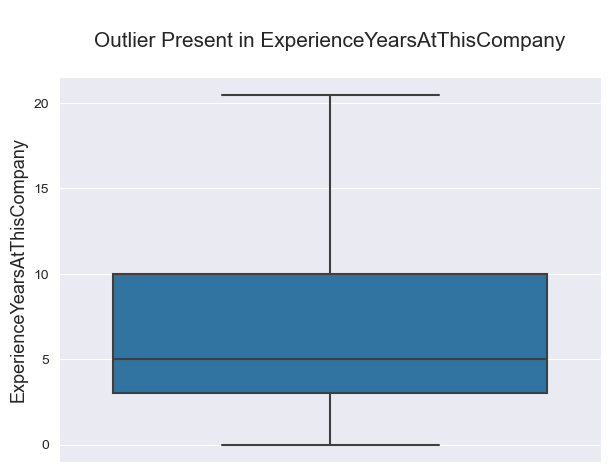

In [20]:
# ExperienceYearsAtThisCompany :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsAtThisCompany"]) 
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n", fontsize=15)
plt.ylabel("ExperienceYearsAtThisCompany", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## ExperienceYearsInCurrentRole

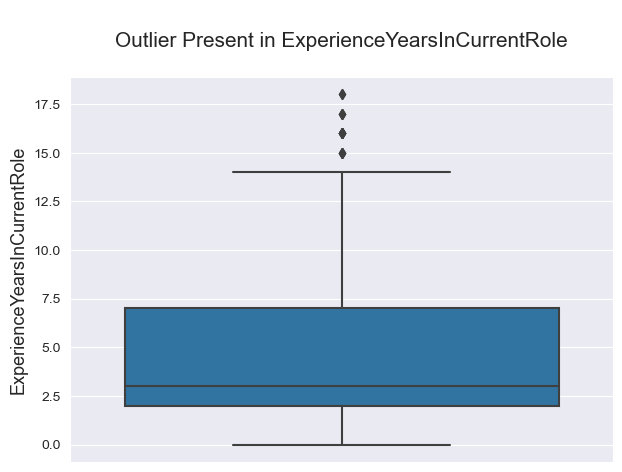

In [21]:
# Outlier Present in ExperienceYearsInCurrentRole
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsInCurrentRole"]) 
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n", fontsize=15)
plt.ylabel("ExperienceYearsInCurrentRole", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [22]:
# Outlier value present in ExperienceYearsInCurrentRole using Z-score method
mean = np.mean(data["ExperienceYearsInCurrentRole"]) 
std = np.std(data["ExperienceYearsInCurrentRole"]) 
threshold = 3.5
outlier = [] 
for i in data["ExperienceYearsInCurrentRole"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 18, 18, 17]


In [23]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["ExperienceYearsInCurrentRole"], 25)
Q3 = np.percentile(data["ExperienceYearsInCurrentRole"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["ExperienceYearsInCurrentRole"] > upper_bound, "ExperienceYearsInCurrentRole"] = upper_bound
data.loc[data["ExperienceYearsInCurrentRole"] < lower_bound, "ExperienceYearsInCurrentRole"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\1048997493.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["ExperienceYearsInCurrentRole"] > upper_bound, "ExperienceYearsInCurrentRole"] = upper_bound


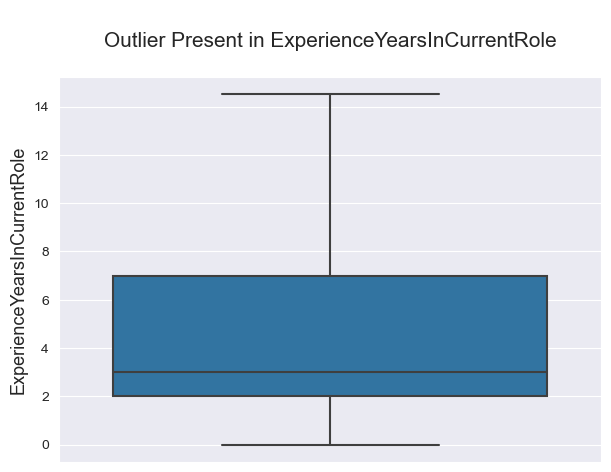

In [24]:
# ExperienceYearsInCurrentRole :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsInCurrentRole"]) 
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n", fontsize=15)
plt.ylabel("ExperienceYearsInCurrentRole", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## YearsSinceLastPromotion

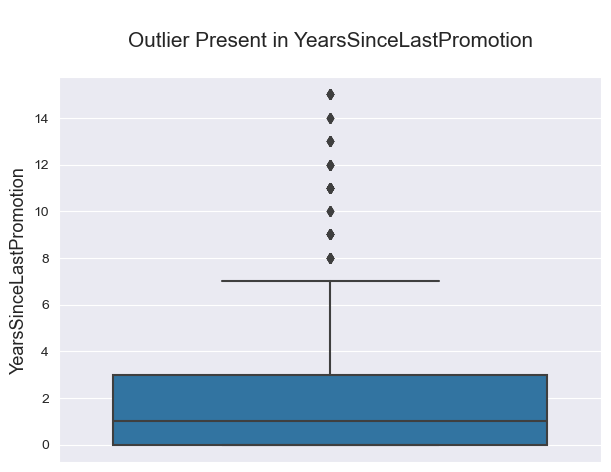

In [25]:
# Outlier Present in YearsSinceLastPromotion
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsSinceLastPromotion"]) 
plt.title("\nOutlier Present in YearsSinceLastPromotion\n", fontsize=15)
plt.ylabel("YearsSinceLastPromotion", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [26]:
# Outlier value present in YearsSinceLastPromotion using Z-score method
mean = np.mean(data["YearsSinceLastPromotion"]) 
std = np.std(data["YearsSinceLastPromotion"]) 
threshold = 3.5
outlier = [] 
for i in data["YearsSinceLastPromotion"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [14, 15, 15, 15, 14, 15, 15, 15, 14, 14, 14, 15, 15, 15, 15, 15]


In [27]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["YearsSinceLastPromotion"], 25)
Q3 = np.percentile(data["YearsSinceLastPromotion"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["YearsSinceLastPromotion"] > upper_bound, "YearsSinceLastPromotion"] = upper_bound
data.loc[data["YearsSinceLastPromotion"] < lower_bound, "YearsSinceLastPromotion"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\2393028811.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["YearsSinceLastPromotion"] > upper_bound, "YearsSinceLastPromotion"] = upper_bound


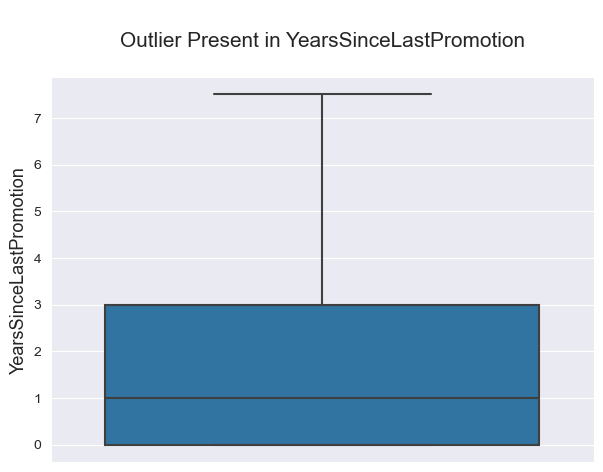

In [28]:
# YearsSinceLastPromotion :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsSinceLastPromotion"]) 
plt.title("\nOutlier Present in YearsSinceLastPromotion\n", fontsize=15)
plt.ylabel("YearsSinceLastPromotion", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## YearsWithCurrManager

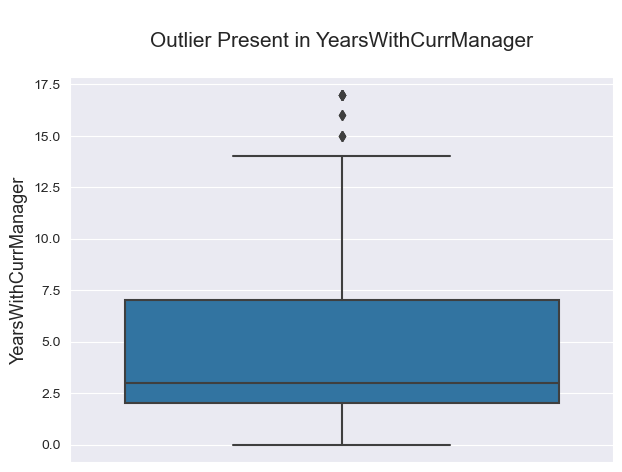

In [29]:
# Outlier Present in YearsWithCurrManager
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsWithCurrManager"]) 
plt.title("\nOutlier Present in YearsWithCurrManager\n", fontsize=15)
plt.ylabel("YearsWithCurrManager", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [30]:
# Outlier value present in YearsWithCurrManager using Z-score method
mean = np.mean(data["YearsWithCurrManager"]) 
std = np.std(data["YearsWithCurrManager"]) 
threshold = 3.5
outlier = [] 
for i in data["YearsWithCurrManager"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 17, 17, 17, 17]


In [31]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["YearsWithCurrManager"], 25)
Q3 = np.percentile(data["YearsWithCurrManager"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["YearsWithCurrManager"] > upper_bound, "YearsWithCurrManager"] = upper_bound
data.loc[data["YearsWithCurrManager"] < lower_bound, "YearsWithCurrManager"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_37680\3714637474.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["YearsWithCurrManager"] > upper_bound, "YearsWithCurrManager"] = upper_bound


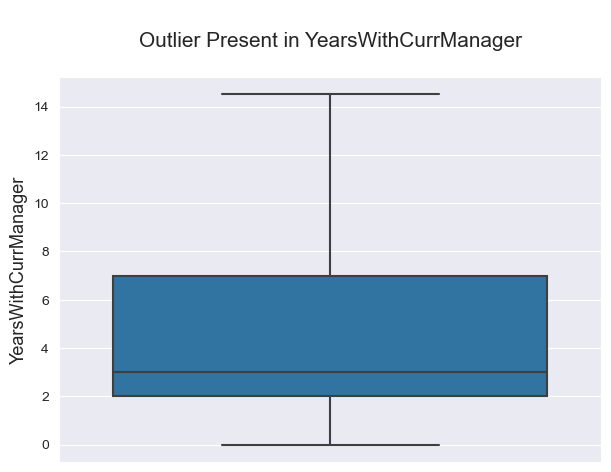

In [32]:
# YearsWithCurrManager :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsWithCurrManager"]) 
plt.title("\nOutlier Present in YearsWithCurrManager\n", fontsize=15)
plt.ylabel("YearsWithCurrManager", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

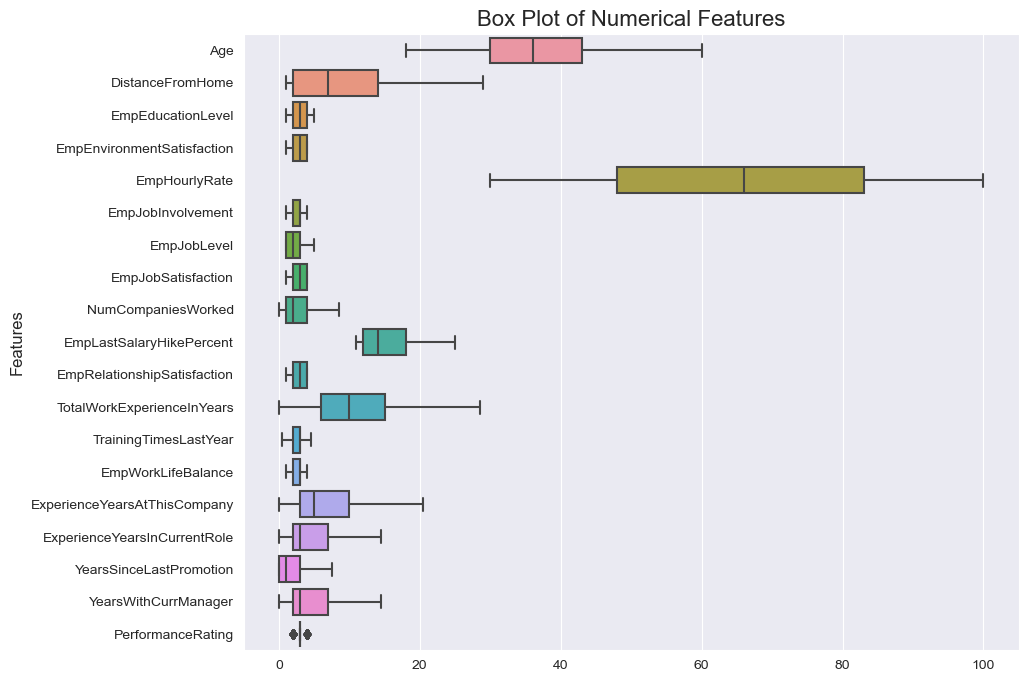

In [33]:
# Visualize boxplot after handling outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.show()

# Label Encoding

In [34]:
# Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)
data.MaritalStatus=lc.fit_transform(data.MaritalStatus)
data.EducationBackground=lc.fit_transform(data.EducationBackground)
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=lc.fit_transform(data.BusinessTravelFrequency)
data.Attrition=lc.fit_transform(data.Attrition)
data.OverTime=lc.fit_transform(data.OverTime)

In [35]:
# dataset after Label Encoding:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,4
1196,E100993,37,1,1,2,1,15,2,10,2,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,3
1197,E100994,50,1,3,1,1,15,2,28,1,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,3
1198,E100995,34,0,3,2,0,1,2,9,3,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,3


# defing Independent variables as x and Dependent variable(Target variable ) as y

In [36]:
x = data.iloc[:,1:]
x

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,3


In [37]:
y = data['PerformanceRating']
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

# Imbalanced Class Detection

In [38]:

class_distribution = y.value_counts(normalize=True)
print(class_distribution)


PerformanceRating
3    0.728333
2    0.161667
4    0.110000
Name: proportion, dtype: float64


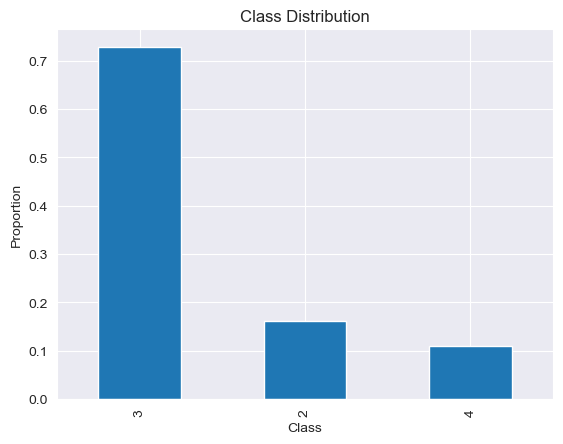

In [39]:
# Visualize Class Distribution:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

### imbalance data analysis
- The imbalance in the target variable "PerformanceRating" is evident, as Class 3 dominates the dataset with a high percentage.
- Classes 2 and 4 are minority classes, which could pose challenges during model training, especially for algorithms sensitive to class imbalance.

# Handling Imbalanced data

In [40]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming x and y are your feature and target variables
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(x, y)

# Convert the oversampled data back to a DataFrame if needed
X_smote = pd.DataFrame(X_smote, columns=x.columns)  # Assuming x is a DataFrame with column names

# Now X_smote and y_smote contain the oversampled data


In [41]:
X_smote

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,18,0,1,2,4,9,0,1,3,4,...,3,0.0,4.5,4,0.0,0.0,0.0,0.0,0,4
2618,28,1,3,1,5,14,2,10,1,4,...,2,1.0,4.5,3,1.0,0.0,0.0,0.0,0,4
2619,19,0,3,2,4,12,0,10,3,1,...,2,1.0,2.0,4,1.0,1.0,0.0,0.0,1,4
2620,41,1,1,1,4,12,2,1,3,4,...,1,12.0,3.0,3,5.0,3.0,1.0,0.0,0,4


In [42]:
y_smote= pd.DataFrame(y_smote)
y_smote.columns =["PerfomanceRating"]

In [43]:
y_smote.value_counts()

PerfomanceRating
2                   874
3                   874
4                   874
Name: count, dtype: int64

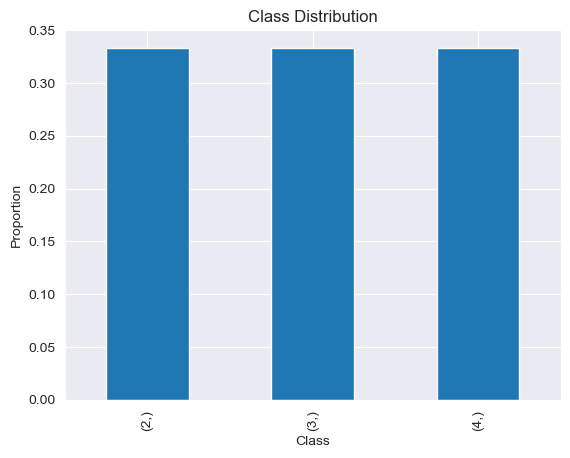

In [44]:
#Visualize Class Distribution: after balancing the data
class_distribution_balanced = y_smote.value_counts(normalize=True)
class_distribution_balanced.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

# Splitting the dataset into the Training set and Test set

In [45]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=4)

In [46]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1600,52,0,2,1,5,8,2,2,1,1,...,4,28.5,3.0,3,20.5,14.0,6.0,9.0,1,2
1700,45,0,2,2,5,8,2,2,3,1,...,1,26.0,2.0,3,20.5,10.0,1.0,11.0,1,2
830,30,1,1,1,1,3,2,1,1,4,...,3,10.0,1.0,2,10.0,8.0,3.0,0.0,0,3
1162,24,0,1,1,1,15,1,7,3,1,...,4,6.0,4.0,3,6.0,3.0,1.0,2.0,1,2
2056,56,1,1,0,4,5,0,1,4,3,...,1,13.0,2.0,2,13.0,12.0,1.0,9.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,26,1,3,0,4,9,2,21,3,1,...,3,1.0,0.5,2,1.0,1.0,0.0,0.0,1,4
709,24,1,1,2,4,5,2,1,2,2,...,2,4.0,2.0,2,4.0,3.0,1.0,2.0,0,2
2487,39,1,1,1,4,9,0,25,2,3,...,2,13.0,2.0,3,6.0,4.0,0.0,5.0,0,4
174,55,1,3,1,4,5,1,18,4,3,...,4,17.0,3.0,3,8.0,7.0,6.0,7.0,0,3


In [47]:
y_train

,PerfomanceRating
1600,2
1700,2
830,3
1162,2
2056,4
...,...
1921,4
709,2
2487,4
174,3


# Scaling

In [48]:
#Scaling : Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# # Create Support Vector Classifier (SVC)

In [55]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [56]:
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([2, 4, 3, 2, 4, 3, 4, 4, 3, 4, 3, 4, 2, 3, 3, 3, 3, 2, 4, 4, 2, 4,
       4, 4, 3, 2, 3, 2, 3, 4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 2, 2, 3, 4, 3,
       3, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 3, 2, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 3, 2, 4, 4, 2, 4, 2, 4, 2, 3, 2, 2, 4, 3, 3,
       4, 4, 2, 2, 2, 3, 2, 3, 2, 2, 2, 4, 2, 4, 2, 3, 3, 2, 4, 4, 3, 4,
       4, 2, 3, 4, 2, 4, 3, 2, 2, 3, 4, 3, 2, 4, 4, 3, 4, 2, 3, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 4, 2, 4, 2, 2, 3, 4, 2, 3, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 3, 4, 3, 4, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 3, 4, 3, 3, 2, 4, 3, 4, 2,
       4, 3, 4, 4, 4, 2, 4, 2, 3, 4, 3, 3, 3, 2, 2, 2, 4, 3, 4, 4, 2, 4,
       4, 4, 2, 2, 3, 4, 3, 4, 3, 2, 2, 4, 2, 2, 3, 3, 3, 2, 4, 3, 3, 2,
       4, 4, 3, 4, 4, 4, 3, 4, 2, 3, 4, 3, 4, 4, 3, 3, 2, 3, 2, 2, 3, 4,
       3, 4, 3, 3, 4, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 4, 4, 2, 3, 4,
       3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 4, 3, 2,

In [57]:
y_test

,PerfomanceRating
1650,2
2457,4
656,3
1435,2
2229,4
...,...
1222,2
516,3
1031,3
1498,2


In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# For this SVM classifier, we do not need to tune the hyperparameters because we're already getting an accuracy of 99.48. you can use if you need.

# Tuning hyperparameters using GridSearchCV for SVC

In [53]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Create a pipeline with scaling and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid
param_grid = {
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto']  
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_
'''


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ...svc__C=0.1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......svc__C=0.1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END .......svc__C=0.1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........svc__C=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ........svc__C=1, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END .........svc__C=1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END ....svc__C=10, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=10, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=10, svc__gamma=scale, svc__kernel=linear; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ....svc__C=10, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ....svc__C=10, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .......svc__C=10, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=10, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......svc__C=10, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=10, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=10, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ........svc__C=10, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=10, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=10, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=10, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........svc__C=10, svc__gamma=auto, svc__kernel=rbf; total time=   0.0s
Best Hyperparameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


c:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
'''
# Calculate Accuracy After tuning hyperparameters using GridSearchCV for SVC

# Make predictions on test set
y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

Accuracy: 1.0
